In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
pd.set_option('max_rows',24)
pd.set_option("precision",2)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16))
import scipy.stats as stats
%matplotlib inline


In [2]:
df = pd.read_csv("parkinsons-3.data.txt", delimiter=",")

In [3]:
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1       119.99        157.30         75.00        7.84e-03   
1    phon_R01_S01_2       122.40        148.65        113.82        9.68e-03   
2    phon_R01_S01_3       116.68        131.11        111.56        1.05e-02   
3    phon_R01_S01_4       116.68        137.87        111.37        9.97e-03   
4    phon_R01_S01_5       116.01        141.78        110.66        1.28e-02   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2       174.19        230.98         94.26        4.59e-03   
191  phon_R01_S50_3       209.52        253.02         89.49        5.64e-03   
192  phon_R01_S50_4       174.69        240.00         74.29        1.36e-02   
193  phon_R01_S50_5       198.76        396.96         74.90        7.40e-03   
194  phon_R01_S50_6       214.29        260.28         77.97        5.67e-03   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            7.00e-05  3.70e-03  5.54e-03    1.11e-02          0.04   
1            8.00e-05  4.65e-03  6.96e-03    1.39e-02          0.06   
2            9.00e-05  5.44e-03  7.81e-03    1.63e-02          0.05   
3            9.00e-05  5.02e-03  6.98e-03    1.50e-02          0.05   
4            1.10e-04  6.55e-03  9.08e-03    1.97e-02          0.06   
..                ...       ...       ...         ...           ...   
190          3.00e-05  2.63e-03  2.59e-03    7.90e-03          0.04   
191          3.00e-05  3.31e-03  2.92e-03    9.94e-03          0.03   
192          8.00e-05  6.24e-03  5.64e-03    1.87e-02          0.02   
193          4.00e-05  3.70e-03  3.90e-03    1.11e-02          0.02   
194          3.00e-05  2.95e-03  3.17e-03    8.85e-03          0.02   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0                0.43          0.02          0.03      0.03         0.07   
1                0.63          0.03          0.05      0.04         0.09   
2                0.48          0.03          0.04      0.04         0.08   
3                0.52          0.03          0.04      0.04         0.09   
4                0.58          0.03          0.05      0.04         0.10   
..                ...           ...           ...       ...          ...   
190              0.41          0.02          0.02      0.03         0.07   
191              0.26          0.02          0.02      0.02         0.05   
192              0.26          0.01          0.01      0.02         0.04   
193              0.24          0.01          0.01      0.02         0.04   
194              0.19          0.01          0.01      0.01         0.03   

      NHR    HNR  status  RPDE   DFA  spread1  spread2    D2   PPE  
0    0.02  21.03       1  0.41  0.82    -4.81     0.27  2.30  0.28  
1    0.02  19.09       1  0.46  0.82    -4.08     0.34  2.49  0.37  
2    0.01  20.65       1  0.43  0.83    -4.44     0.31  2.34  0.33  
3    0.01  20.64       1  0.43  0.82    -4.12     0.33  2.41  0.37  
4    0.02  19.65       1  0.42  0.82    -3.75     0.23  2.33  0.41  
..    ...    ...     ...   ...   ...      ...      ...   ...   ...  
190  0.03  19.52       0  0.45  0.66    -6.54     0.12  2.66  0.13  
191  0.02  19.15       0  0.43  0.68    -6.20     0.13  2.78  0.17  
192  0.11  17.88       0  0.41  0.66    -6.79     0.16  2.68  0.13  
193  0.07  19.02       0  0.45  0.64    -6.74     0.21  2.14  0.12  
194  0.04  21.21       0  0.46  0.66    -5.72     0.19  2.56  0.15  

[195 rows x 24 columns]

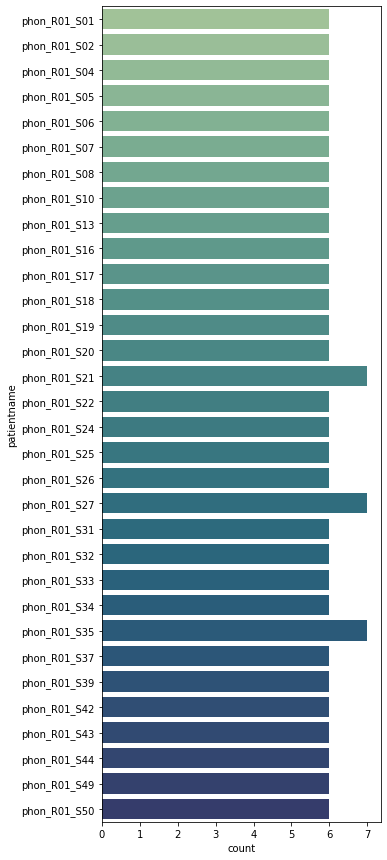

In [6]:
f, ax = plt.subplots(figsize=(5, 15))
sns.countplot(y='patientname',data=df, palette="crest")
plt.savefig("count pateints records.png")

In [74]:
df['patientname'].dtype

dtype('O')

In [5]:
df['patientname'] = df['name'].apply(lambda y : y[:-2])
 

In [64]:
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1       119.99        157.30         75.00        7.84e-03   
1    phon_R01_S01_2       122.40        148.65        113.82        9.68e-03   
2    phon_R01_S01_3       116.68        131.11        111.56        1.05e-02   
3    phon_R01_S01_4       116.68        137.87        111.37        9.97e-03   
4    phon_R01_S01_5       116.01        141.78        110.66        1.28e-02   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2       174.19        230.98         94.26        4.59e-03   
191  phon_R01_S50_3       209.52        253.02         89.49        5.64e-03   
192  phon_R01_S50_4       174.69        240.00         74.29        1.36e-02   
193  phon_R01_S50_5       198.76        396.96         74.90        7.40e-03   
194  phon_R01_S50_6       214.29        260.28         77.97        5.67e-03   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            7.00e-05  3.70e-03  5.54e-03    1.11e-02          0.04   
1            8.00e-05  4.65e-03  6.96e-03    1.39e-02          0.06   
2            9.00e-05  5.44e-03  7.81e-03    1.63e-02          0.05   
3            9.00e-05  5.02e-03  6.98e-03    1.50e-02          0.05   
4            1.10e-04  6.55e-03  9.08e-03    1.97e-02          0.06   
..                ...       ...       ...         ...           ...   
190          3.00e-05  2.63e-03  2.59e-03    7.90e-03          0.04   
191          3.00e-05  3.31e-03  2.92e-03    9.94e-03          0.03   
192          8.00e-05  6.24e-03  5.64e-03    1.87e-02          0.02   
193          4.00e-05  3.70e-03  3.90e-03    1.11e-02          0.02   
194          3.00e-05  2.95e-03  3.17e-03    8.85e-03          0.02   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0                0.43          0.02          0.03      0.03         0.07   
1                0.63          0.03          0.05      0.04         0.09   
2                0.48          0.03          0.04      0.04         0.08   
3                0.52          0.03          0.04      0.04         0.09   
4                0.58          0.03          0.05      0.04         0.10   
..                ...           ...           ...       ...          ...   
190              0.41          0.02          0.02      0.03         0.07   
191              0.26          0.02          0.02      0.02         0.05   
192              0.26          0.01          0.01      0.02         0.04   
193              0.24          0.01          0.01      0.02         0.04   
194              0.19          0.01          0.01      0.01         0.03   

      NHR    HNR  status  RPDE   DFA  spread1  spread2    D2   PPE  \
0    0.02  21.03       1  0.41  0.82    -4.81     0.27  2.30  0.28   
1    0.02  19.09       1  0.46  0.82    -4.08     0.34  2.49  0.37   
2    0.01  20.65       1  0.43  0.83    -4.44     0.31  2.34  0.33   
3    0.01  20.64       1  0.43  0.82    -4.12     0.33  2.41  0.37   
4    0.02  19.65       1  0.42  0.82    -3.75     0.23  2.33  0.41   
..    ...    ...     ...   ...   ...      ...      ...   ...   ...   
190  0.03  19.52       0  0.45  0.66    -6.54     0.12  2.66  0.13   
191  0.02  19.15       0  0.43  0.68    -6.20     0.13  2.78  0.17   
192  0.11  17.88       0  0.41  0.66    -6.79     0.16  2.68  0.13   
193  0.07  19.02       0  0.45  0.64    -6.74     0.21  2.14  0.12   
194  0.04  21.21       0  0.46  0.66    -5.72     0.19  2.56  0.15   

      patientname  
0    phon_R01_S01  
1    phon_R01_S01  
2    phon_R01_S01  
3    phon_R01_S01  
4    phon_R01_S01  
..            ...  
190  phon_R01_S50  
191  phon_R01_S50  
192  phon_R01_S50  
193  phon_R01_S50  
194  phon_R01_S50  

[195 rows x 25 columns]

In [7]:
df_grouped = df.groupby('patientname').agg('mean')

In [8]:
df_grouped

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
patientname                                                             
phon_R01_S01       118.72        141.31        106.03        1.01e-02   
phon_R01_S02        99.77        121.89         95.41        4.58e-03   
phon_R01_S04       147.35        216.87         87.53        4.35e-03   
phon_R01_S05       159.84        181.63         86.77        6.25e-03   
phon_R01_S06       150.64        208.26         78.28        5.23e-03   
...                   ...           ...           ...             ...   
phon_R01_S42       236.08        248.04        186.41        4.48e-03   
phon_R01_S43       114.30        126.67        103.38        3.49e-03   
phon_R01_S44       149.56        165.41        139.24        3.57e-03   
phon_R01_S49       116.30        301.88         95.04        3.92e-03   
phon_R01_S50       195.54        273.99         81.52        7.31e-03   

              MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
patientname                                                                    
phon_R01_S01          8.67e-05  5.00e-03  7.31e-03    1.50e-02          0.05   
phon_R01_S02          5.00e-05  2.33e-03  2.86e-03    6.98e-03          0.02   
phon_R01_S04          3.00e-05  1.76e-03  2.32e-03    5.29e-03          0.02   
phon_R01_S05          4.00e-05  3.06e-03  3.42e-03    9.19e-03          0.04   
phon_R01_S06          3.67e-05  2.72e-03  2.84e-03    8.17e-03          0.02   
...                        ...       ...       ...         ...           ...   
phon_R01_S42          1.83e-05  2.69e-03  2.44e-03    8.09e-03          0.02   
phon_R01_S43          3.00e-05  1.69e-03  2.04e-03    5.06e-03          0.02   
phon_R01_S44          2.50e-05  1.79e-03  2.08e-03    5.37e-03          0.02   
phon_R01_S49          3.50e-05  1.83e-03  2.34e-03    5.48e-03          0.02   
phon_R01_S50          4.00e-05  3.83e-03  3.70e-03    1.15e-02          0.03   

              MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  \
patientname                                                            
phon_R01_S01              0.52      2.80e-02      3.98e-02      0.04   
phon_R01_S02              0.19      1.10e-02      1.31e-02      0.02   
phon_R01_S04              0.18      9.38e-03      1.10e-02      0.02   
phon_R01_S05              0.39      2.05e-02      2.66e-02      0.04   
phon_R01_S06              0.21      9.67e-03      1.26e-02      0.02   
...                        ...           ...           ...       ...   
phon_R01_S42              0.19      1.14e-02      1.16e-02      0.01   
phon_R01_S43              0.14      7.89e-03      9.43e-03      0.01   
phon_R01_S44              0.17      9.53e-03      1.12e-02      0.02   
phon_R01_S49              0.14      7.25e-03      9.73e-03      0.02   
phon_R01_S50              0.27      1.49e-02      1.60e-02      0.02   

              Shimmer:DDA       NHR    HNR  status  RPDE   DFA  spread1  \
patientname                                                               
phon_R01_S01         0.08  1.63e-02  20.41       1  0.43  0.82    -4.24   
phon_R01_S02         0.03  8.92e-03  23.00       1  0.60  0.78    -5.42   
phon_R01_S04         0.03  1.31e-02  23.90       1  0.52  0.65    -5.34   
phon_R01_S05         0.06  2.56e-02  19.06       1  0.63  0.70    -4.56   
phon_R01_S06         0.03  1.49e-02  24.76       1  0.43  0.72    -6.22   
...                   ...       ...    ...     ...   ...   ...      ...   
phon_R01_S42         0.03  9.02e-03  21.94       0  0.43  0.65    -6.93   
phon_R01_S43         0.02  4.58e-03  26.19       0  0.39  0.76    -6.06   
phon_R01_S44         0.03  5.74e-03  23.54       1  0.38  0.76    -6.13   
phon_R01_S49         0.02  9.42e-03  23.85       0  0.59  0.66    -5.99   
phon_R01_S50         0.04  5.23e-02  19.36       0  0.45  0.66    -6.49   

              spread2    D2   PPE  
patientname                        
phon_R01_S01     0.30  2.34  0.35  
ph

In [114]:
list(df['patientname'].unique()).index("phon_R01_S01")

0

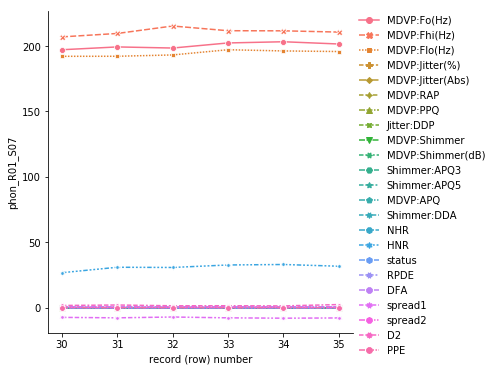

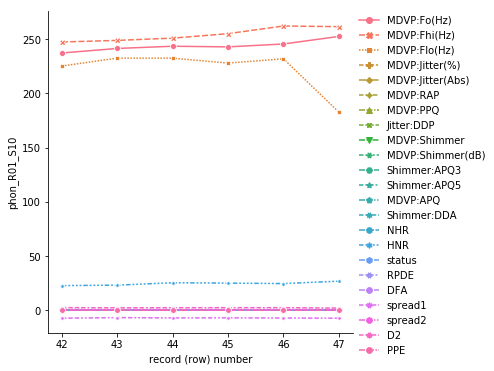

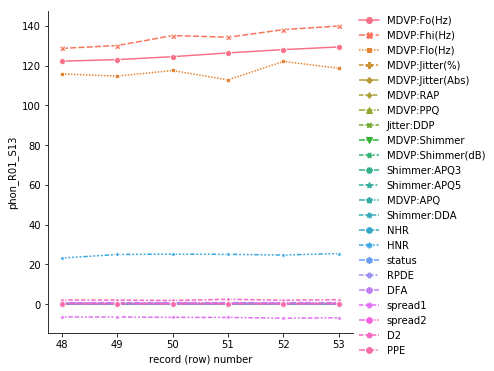

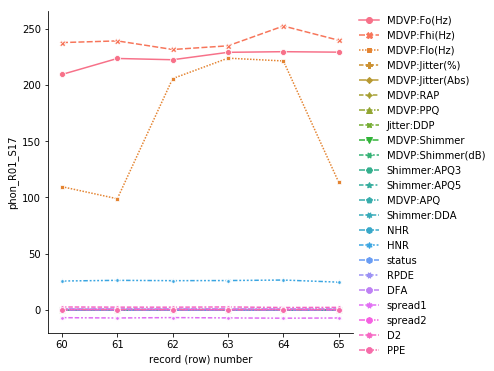

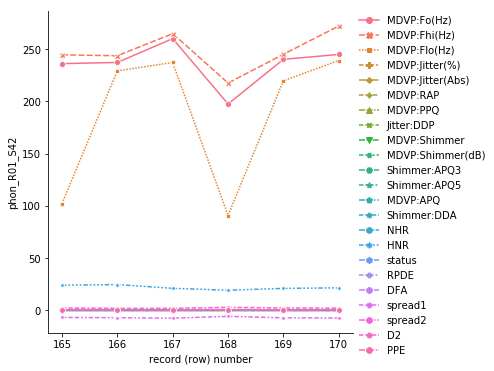

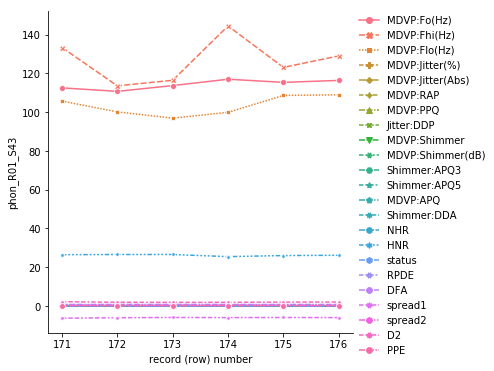

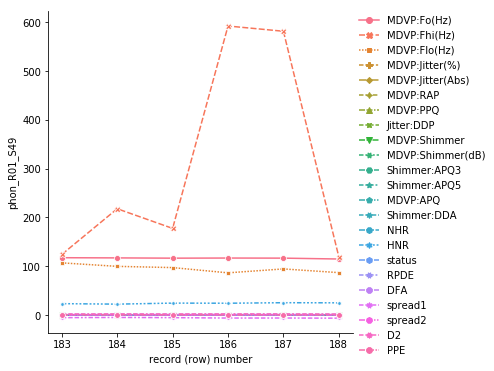

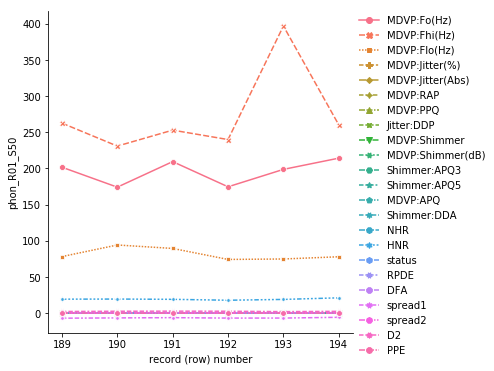

In [22]:
for x in (df[df['status']==0]['patientname'].unique()):
    plot = sns.relplot(data=df[df['patientname']==x],kind="line", markers=True)
    plot.set(xlabel="record (row) number", ylabel=x)
    plt.savefig(f'{x}patient_records.png')

In [26]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE', 'patientname'],
      dtype='object')

In [31]:
df[df['status']==0][['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA']]

MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP
30         2.89e-03          1.00e-05  1.66e-03  1.68e-03    4.98e-03
31         2.41e-03          1.00e-05  1.34e-03  1.38e-03    4.02e-03
32         2.12e-03          1.00e-05  1.13e-03  1.35e-03    3.39e-03
33         1.80e-03          9.00e-06  9.30e-04  1.07e-03    2.78e-03
34         1.78e-03          9.00e-06  9.40e-04  1.06e-03    2.83e-03
..              ...               ...       ...       ...         ...
190        4.59e-03          3.00e-05  2.63e-03  2.59e-03    7.90e-03
191        5.64e-03          3.00e-05  3.31e-03  2.92e-03    9.94e-03
192        1.36e-02          8.00e-05  6.24e-03  5.64e-03    1.87e-02
193        7.40e-03          4.00e-05  3.70e-03  3.90e-03    1.11e-02
194        5.67e-03          3.00e-05  2.95e-03  3.17e-03    8.85e-03

[48 rows x 5 columns]

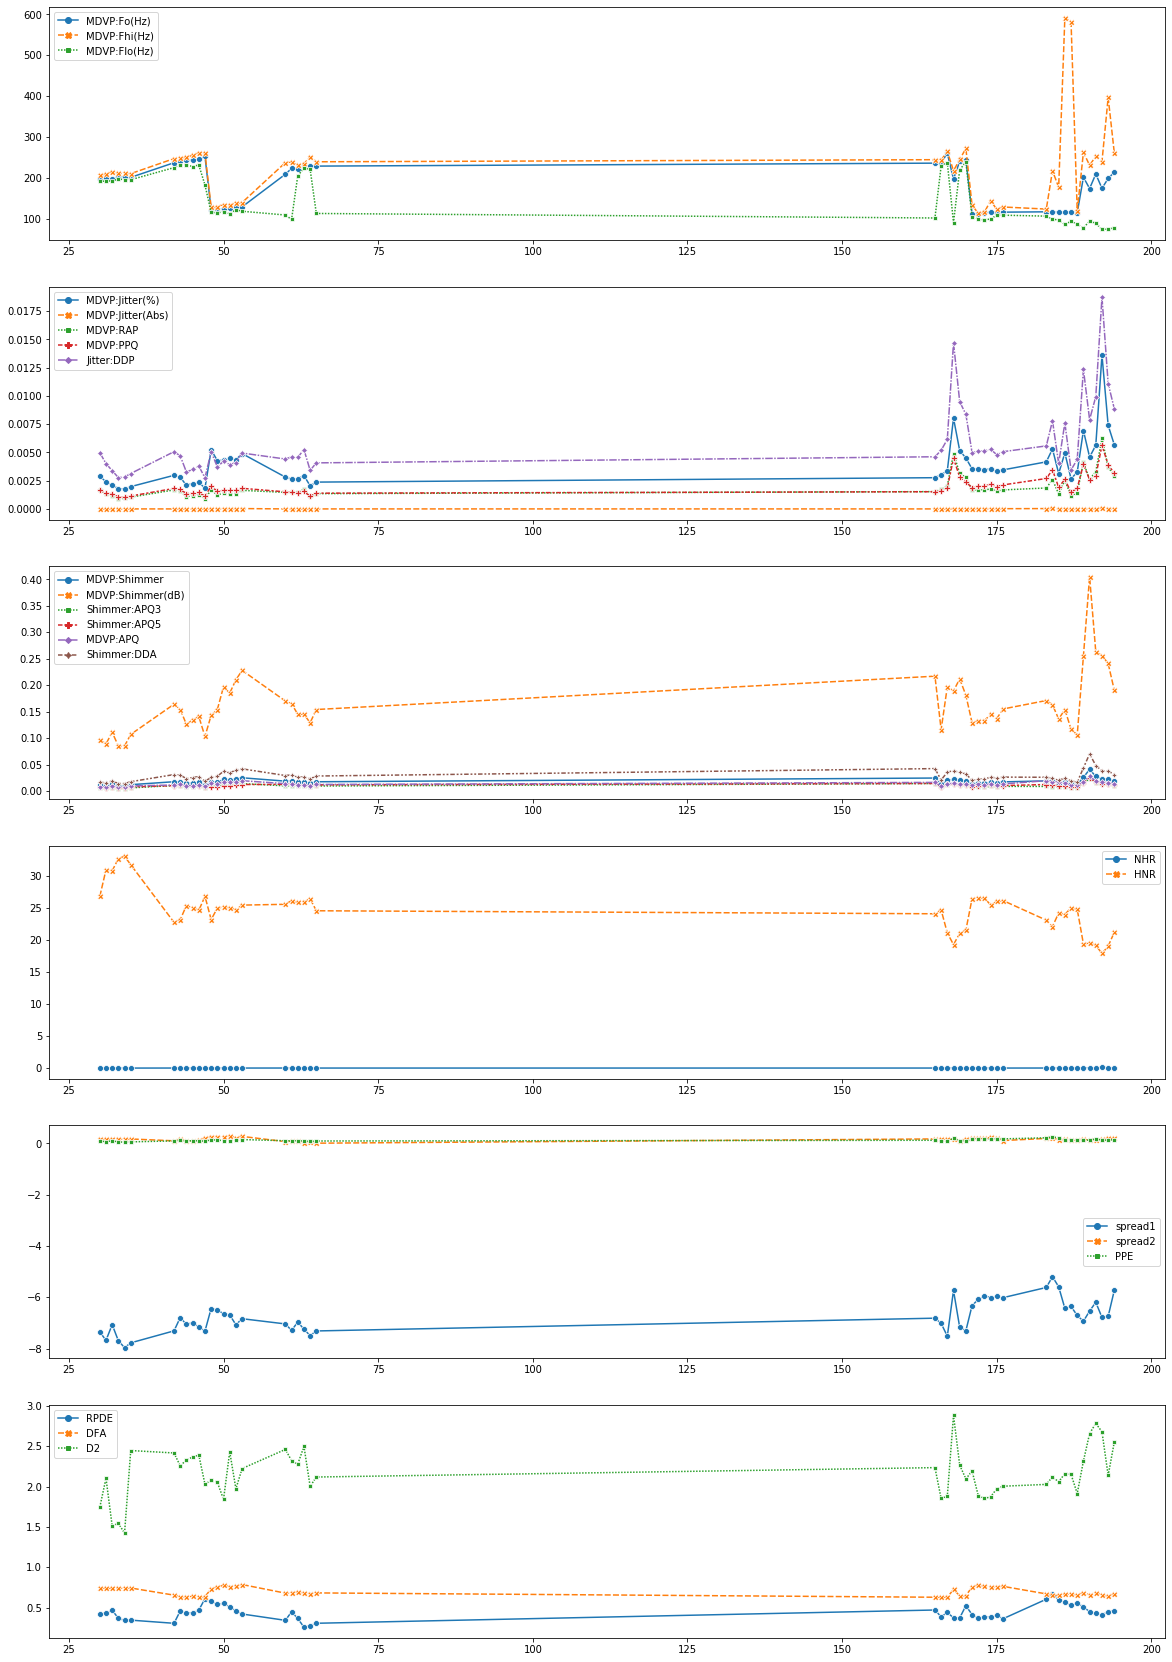

In [43]:
fig, ax =plt.subplots(6,1, figsize=(20,30))

sns.lineplot(data=df[df['status']==0][['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']],
             markers=True, ax=ax[0])
sns.lineplot(data=df[df['status']==0][['MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']],
             markers=True, ax=ax[1])
sns.lineplot(data=df[df['status']==0][['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA']],
             markers=True, ax=ax[2])
sns.lineplot(data=df[df['status']==0][['NHR', 'HNR']],
             markers=True, ax=ax[3])
sns.lineplot(data=df[df['status']==0][['spread1', 'spread2','PPE']],
             markers=True, ax=ax[4])
sns.lineplot(data=df[df['status']==0][['RPDE', 'DFA','D2']],
             markers=True, ax=ax[5])
#plt.savefig("healthy.png")

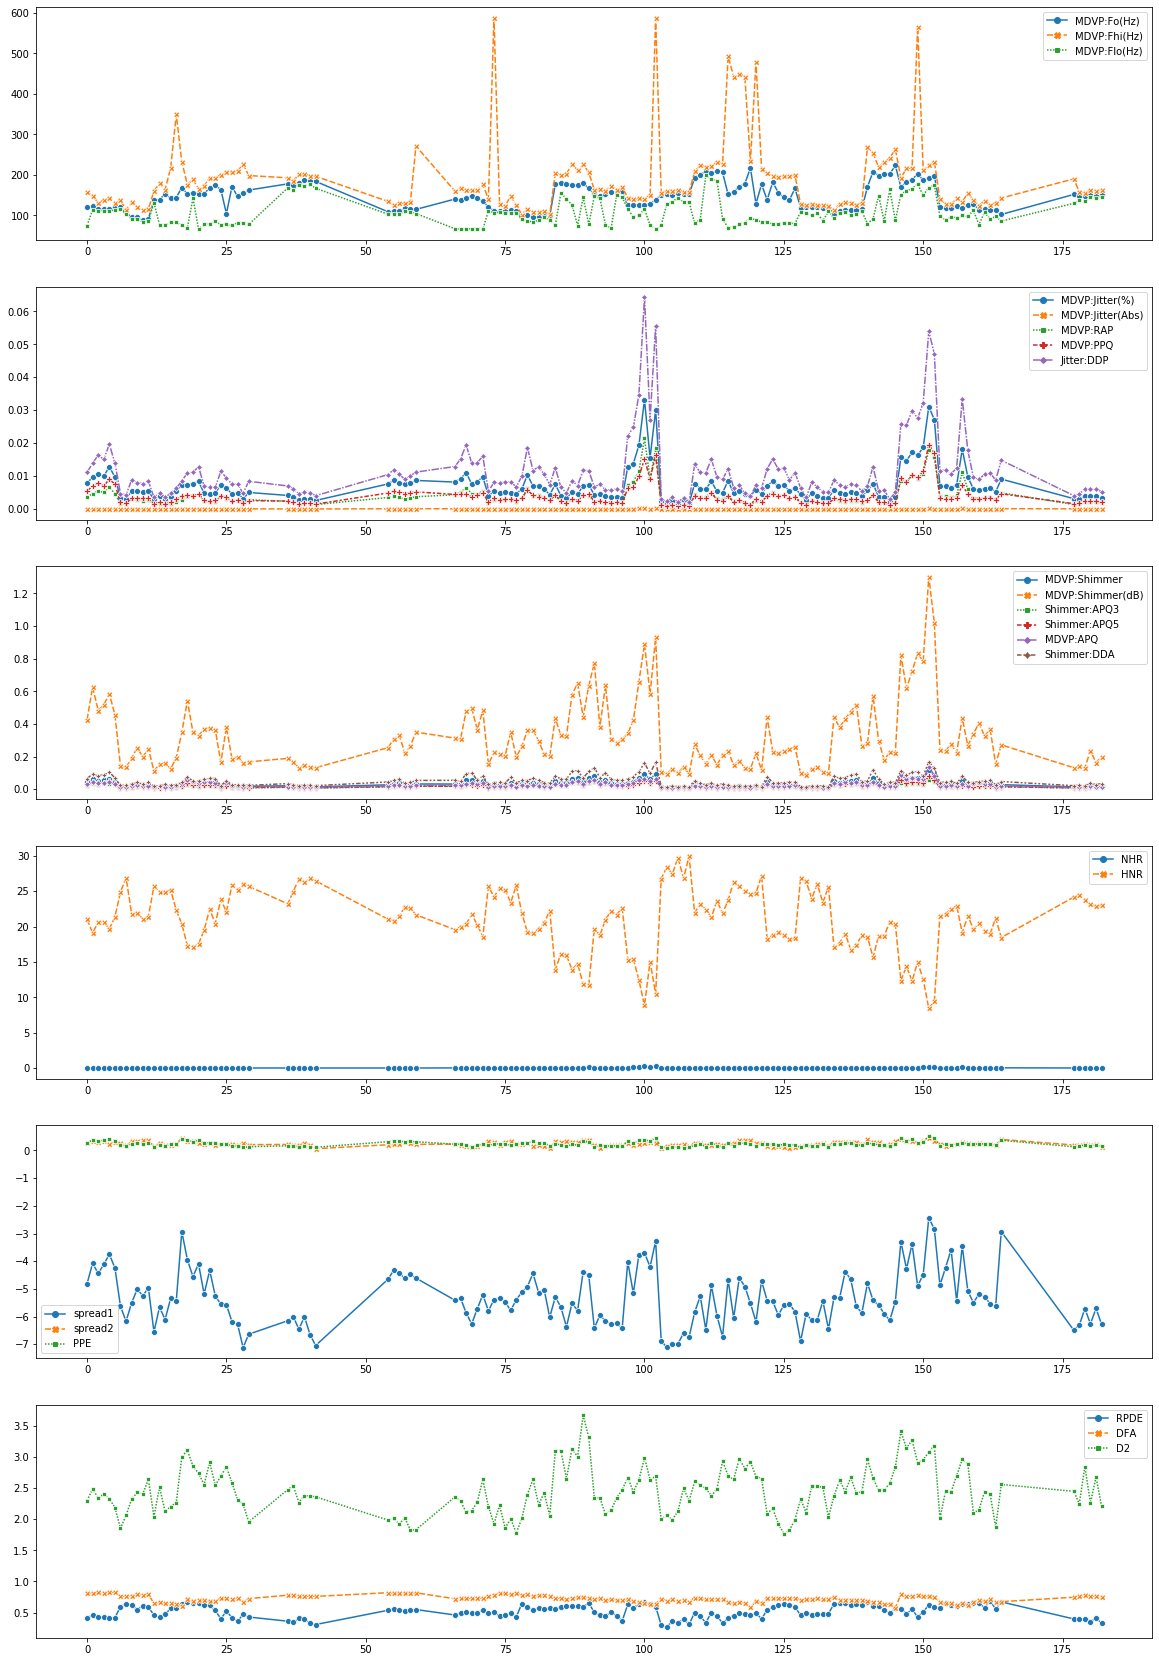

In [44]:
fig, ax =plt.subplots(6,1, figsize=(20,30))

sns.lineplot(data=df[df['status']==1][['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']],
             markers=True, ax=ax[0])
sns.lineplot(data=df[df['status']==1][['MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']],
             markers=True, ax=ax[1])
sns.lineplot(data=df[df['status']==1][['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA']],
             markers=True, ax=ax[2])
sns.lineplot(data=df[df['status']==1][['NHR', 'HNR']],
             markers=True, ax=ax[3])
sns.lineplot(data=df[df['status']==1][['spread1', 'spread2','PPE']],
             markers=True, ax=ax[4])
sns.lineplot(data=df[df['status']==1][['RPDE', 'DFA','D2']],
             markers=True, ax=ax[5])
#plt.savefig("with pD.png")

In [133]:

(df[df['status']==0]['patientname'].unique())

array(['phon_R01_S07', 'phon_R01_S10', 'phon_R01_S13', 'phon_R01_S17',
       'phon_R01_S42', 'phon_R01_S43', 'phon_R01_S49', 'phon_R01_S50'],
      dtype=object)

In [134]:
(df[df['status']==1]['patientname'].unique()) # Pateints with PD

array(['phon_R01_S01', 'phon_R01_S02', 'phon_R01_S04', 'phon_R01_S05',
       'phon_R01_S06', 'phon_R01_S08', 'phon_R01_S16', 'phon_R01_S18',
       'phon_R01_S19', 'phon_R01_S20', 'phon_R01_S21', 'phon_R01_S22',
       'phon_R01_S24', 'phon_R01_S25', 'phon_R01_S26', 'phon_R01_S27',
       'phon_R01_S31', 'phon_R01_S32', 'phon_R01_S33', 'phon_R01_S34',
       'phon_R01_S35', 'phon_R01_S37', 'phon_R01_S39', 'phon_R01_S44'],
      dtype=object)

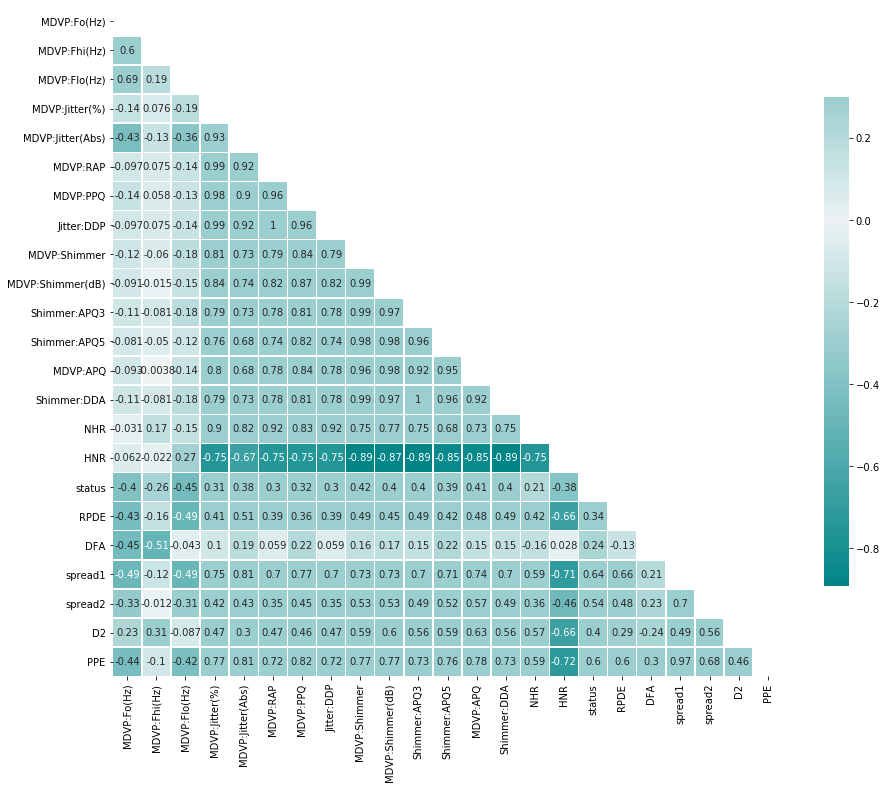

In [59]:
f, ax = plt.subplots(figsize=(15, 18))
cmap = sns.diverging_palette(195, 195, s=100, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot.png")

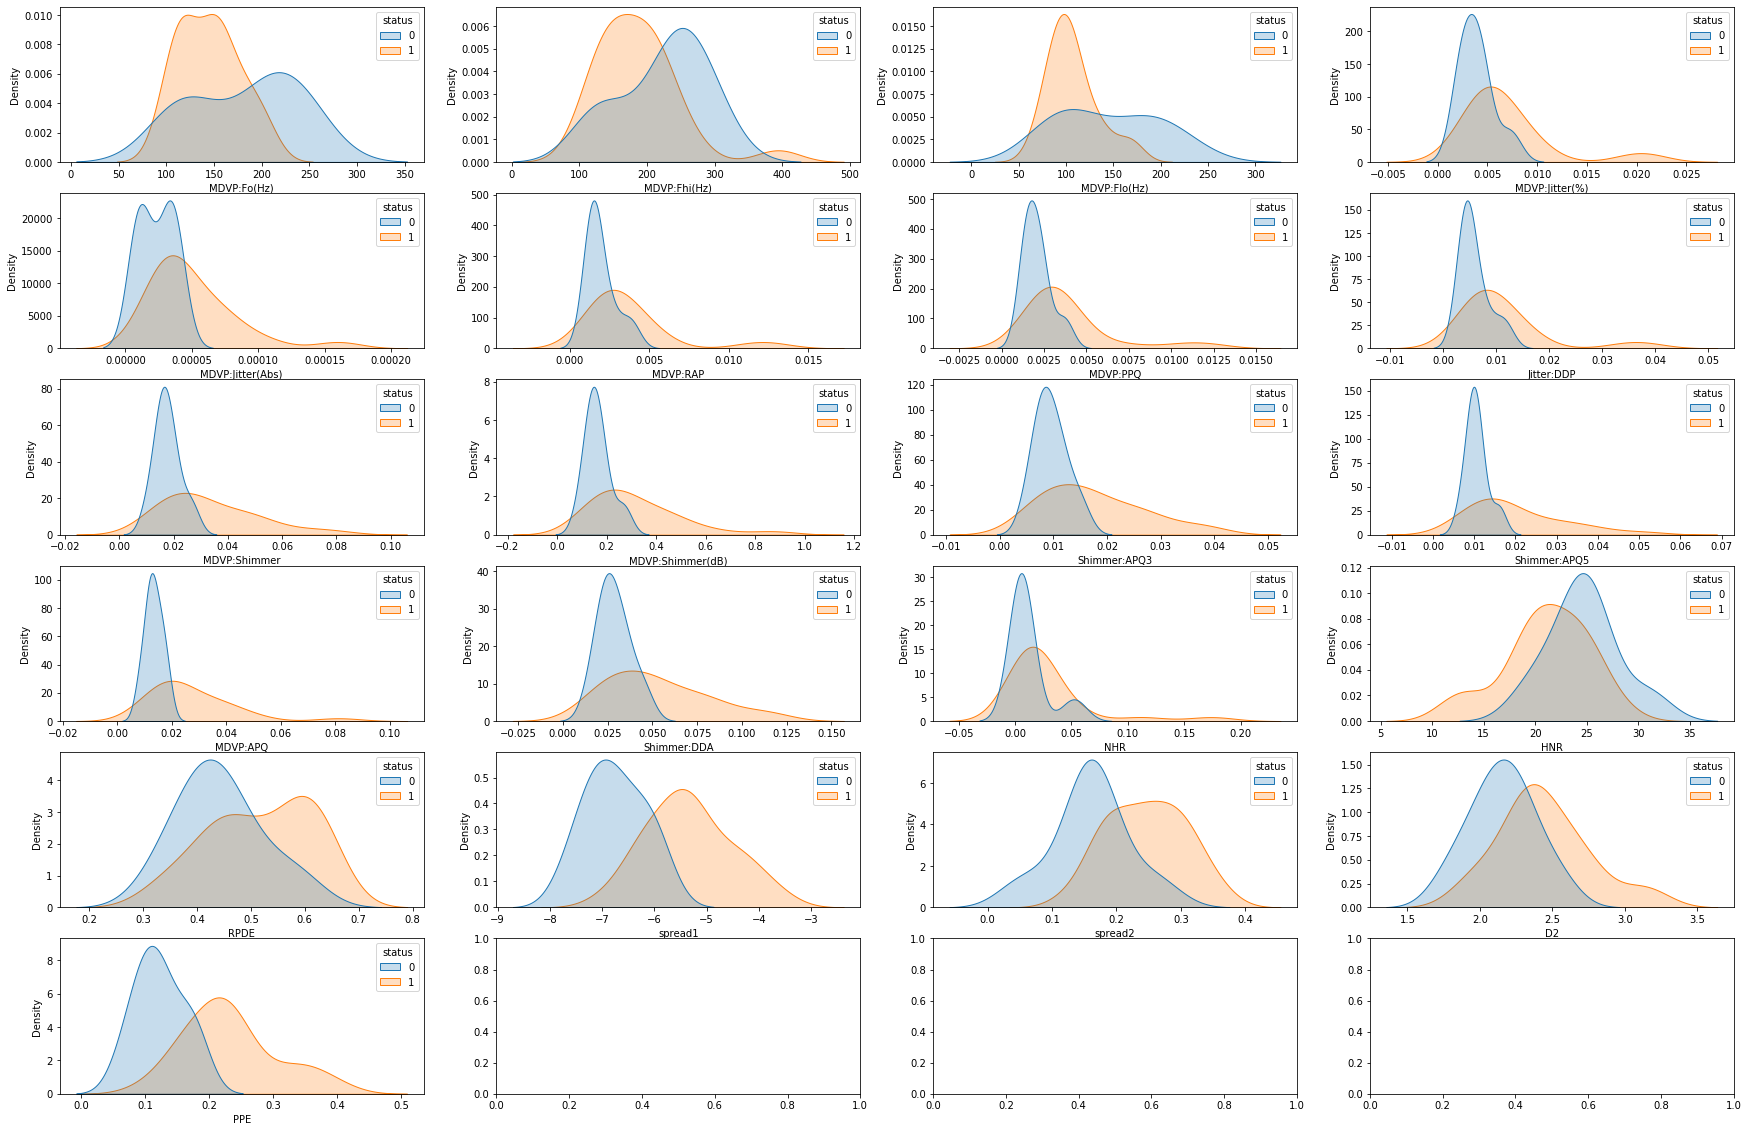

In [180]:
fig, ax =plt.subplots(6,4, figsize=(30,20))
sns.kdeplot(data=df_grouped ,x='MDVP:Fo(Hz)',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[0,0])

sns.kdeplot(data=df_grouped ,x='MDVP:Fhi(Hz)',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[0,1])
sns.kdeplot(data=df_grouped ,x='MDVP:Flo(Hz)',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[0,2])
sns.kdeplot(data=df_grouped ,x='MDVP:Jitter(%)',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[0,3])
sns.kdeplot(data=df_grouped ,x='MDVP:Jitter(Abs)',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[1,0])
sns.kdeplot(data=df_grouped ,x='MDVP:RAP',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[1,1])
sns.kdeplot(data=df_grouped ,x='MDVP:PPQ',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[1,2])
sns.kdeplot(data=df_grouped ,x='Jitter:DDP',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[1,3])
sns.kdeplot(data=df_grouped ,x='MDVP:Shimmer',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[2,0])
sns.kdeplot(data=df_grouped ,x='MDVP:Shimmer(dB)',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[2,1])
sns.kdeplot(data=df_grouped ,x='Shimmer:APQ3',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[2,2])
sns.kdeplot(data=df_grouped ,x='Shimmer:APQ5',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[2,3])
sns.kdeplot(data=df_grouped ,x='MDVP:APQ',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[3,0])
sns.kdeplot(data=df_grouped ,x='Shimmer:DDA',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[3,1])
sns.kdeplot(data=df_grouped ,x='NHR',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[3,2])
sns.kdeplot(data=df_grouped ,x='HNR',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[3,3])
sns.kdeplot(data=df_grouped ,x='RPDE',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[4,0])
sns.kdeplot(data=df_grouped ,x='spread1',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[4,1])
sns.kdeplot(data=df_grouped ,x='spread2',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[4,2])

sns.kdeplot(data=df_grouped ,x='D2',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[4,3])
sns.kdeplot(data=df_grouped ,x='PPE',
            hue=df_grouped['status'], fill=True, 
            common_norm=False, palette="tab10", ax=ax[5,0])
#plt.savefig("kdeplots.png")

In [174]:
df_grouped.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Preprocessing: 

normalizing the data

In [45]:
from sklearn import preprocessing

In [163]:
X = np.array(df.drop(['status','name','patientname'], axis=1))
y = np.array(df['status'])

In [164]:
X = preprocessing.MinMaxScaler().fit_transform(X)

In [165]:
prep_df = pd.DataFrame(X, columns=(df.drop(['status','name','patientname'], axis=1)).columns)
prep_df['status'] =y

In [166]:
prep_df

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0           0.18          0.11          0.05            0.20   
1           0.20          0.09          0.28            0.25   
2           0.17          0.06          0.27            0.28   
3           0.17          0.07          0.26            0.26   
4           0.16          0.08          0.26            0.35   
..           ...           ...           ...             ...   
190         0.50          0.26          0.17            0.09   
191         0.71          0.31          0.14            0.13   
192         0.50          0.28          0.05            0.38   
193         0.64          0.60          0.05            0.18   
194         0.73          0.32          0.07            0.13   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0                0.25      0.15      0.25        0.15          0.31   
1                0.29      0.19      0.32        0.19          0.47   
2                0.33      0.23      0.37        0.23          0.39   
3                0.33      0.21      0.32        0.21          0.41   
4                0.41      0.28      0.44        0.28          0.50   
..                ...       ...       ...         ...           ...   
190              0.09      0.09      0.09        0.09          0.29   
191              0.09      0.13      0.11        0.13          0.16   
192              0.29      0.27      0.25        0.27          0.12   
193              0.13      0.15      0.16        0.15          0.12   
194              0.09      0.11      0.12        0.11          0.08   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0                0.28          0.33          0.35      0.17         0.33   
1                0.44          0.52          0.54      0.28         0.52   
2                0.33          0.44          0.45      0.22         0.44   
3                0.35          0.48          0.47      0.23         0.48   
4                0.41          0.58          0.58      0.29         0.58   
..                ...           ...           ...       ...          ...   
190              0.26          0.36          0.26      0.16         0.36   
191              0.15          0.22          0.15      0.09         0.22   
192              0.14          0.16          0.11      0.07         0.16   
193              0.13          0.16          0.10      0.07         0.16   
194              0.09          0.11          0.08      0.05         0.11   

      NHR   HNR  RPDE   DFA  spread1  spread2    D2   PPE  status  
0    0.07  0.51  0.37  0.96     0.57     0.59  0.39  0.50       1  
1    0.06  0.43  0.47  0.98     0.70     0.74  0.47  0.67       1  
2    0.04  0.50  0.40  1.00     0.64     0.69  0.41  0.60       1  
3    0.04  0.50  0.42  0.98     0.70     0.74  0.44  0.67       1  
4    0.05  0.46  0.38  0.99     0.76     0.51  0.40  0.76       1  
..    ...   ...   ...   ...      ...      ...   ...   ...     ...  
190  0.09  0.45  0.45  0.33     0.26     0.26  0.55  0.18       0  
191  0.06  0.44  0.41  0.43     0.32     0.28  0.61  0.26       0  
192  0.34  0.38  0.35  0.32     0.21     0.34  0.56  0.18       0  
193  0.23  0.43  0.45  0.28     0.22     0.45  0.32  0.16       0  
194  0.14  0.52  0.48  0.36     0.41     0.42  0.50  0.22       0  

[195 rows x 23 columns]

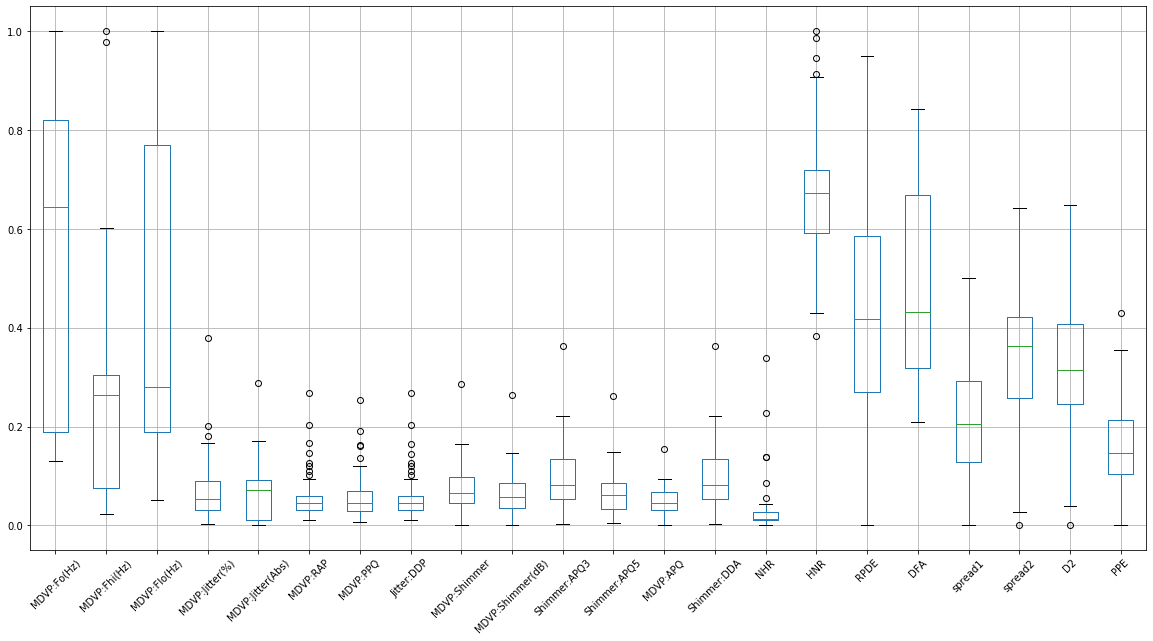

In [228]:
(prep_df[prep_df['status']==0]).drop(['status'],
                                    axis=1).boxplot(figsize=(20,10), rot=45)
plt.savefig("boxplot healthy.png")

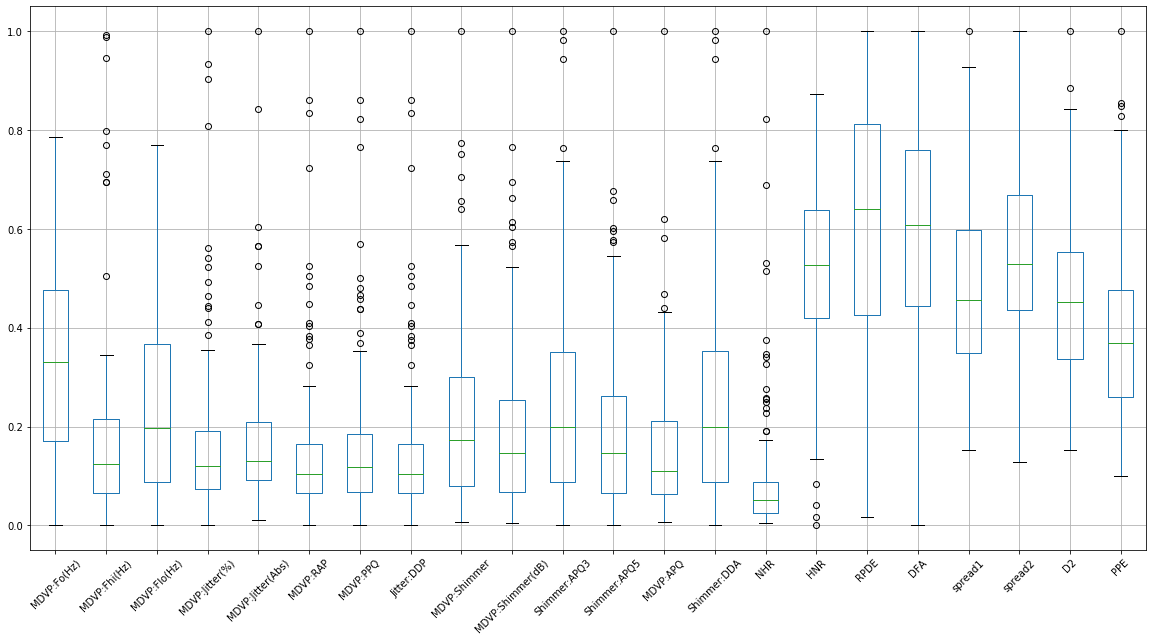

In [229]:
(prep_df[prep_df['status']==1]).drop(['status'],
                                    axis=1).boxplot(figsize=(20,10), rot=45)
plt.savefig("boxplot PD.png")

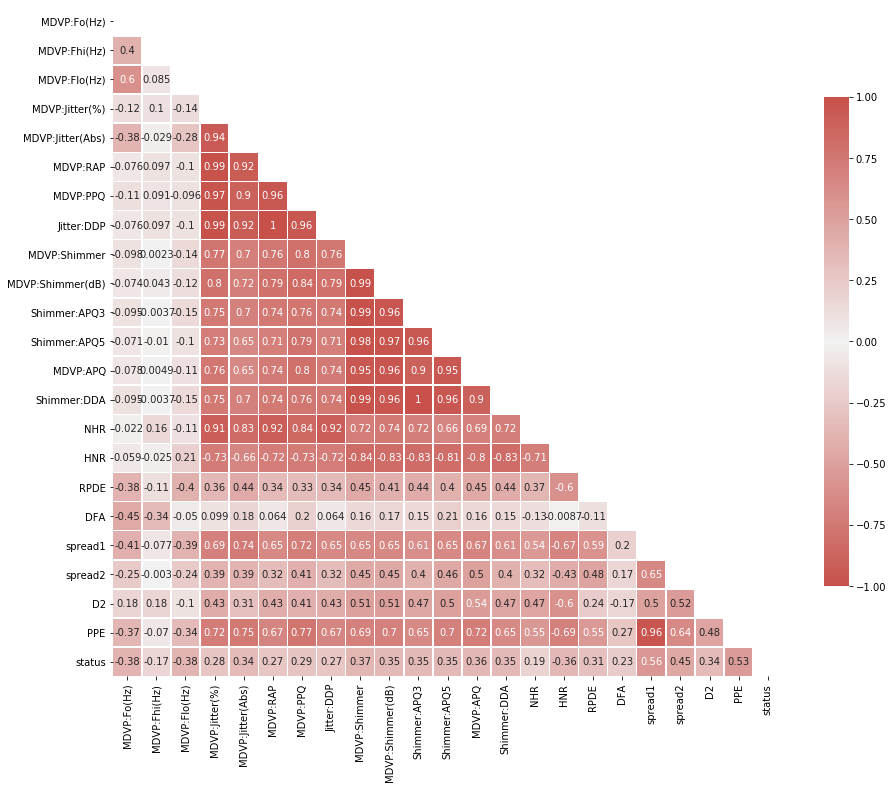

In [75]:
f, ax = plt.subplots(figsize=(15, 18))
cmap = sns.diverging_palette(14, 14, s=60, as_cmap=True)
mask = np.triu(np.ones_like(prep_df.corr(), dtype=bool))
sns.heatmap(prep_df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion plot.png")

In [54]:
#Correlation with output variable
cor = prep_df.corr()
cor_target = abs(cor["status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

MDVP:Fo(Hz)         0.38
MDVP:Flo(Hz)        0.38
MDVP:Jitter(Abs)    0.34
MDVP:Shimmer        0.37
MDVP:Shimmer(dB)    0.35
Shimmer:APQ3        0.35
Shimmer:APQ5        0.35
MDVP:APQ            0.36
Shimmer:DDA         0.35
HNR                 0.36
RPDE                0.31
spread1             0.56
spread2             0.45
D2                  0.34
PPE                 0.53
status              1.00
Name: status, dtype: float64

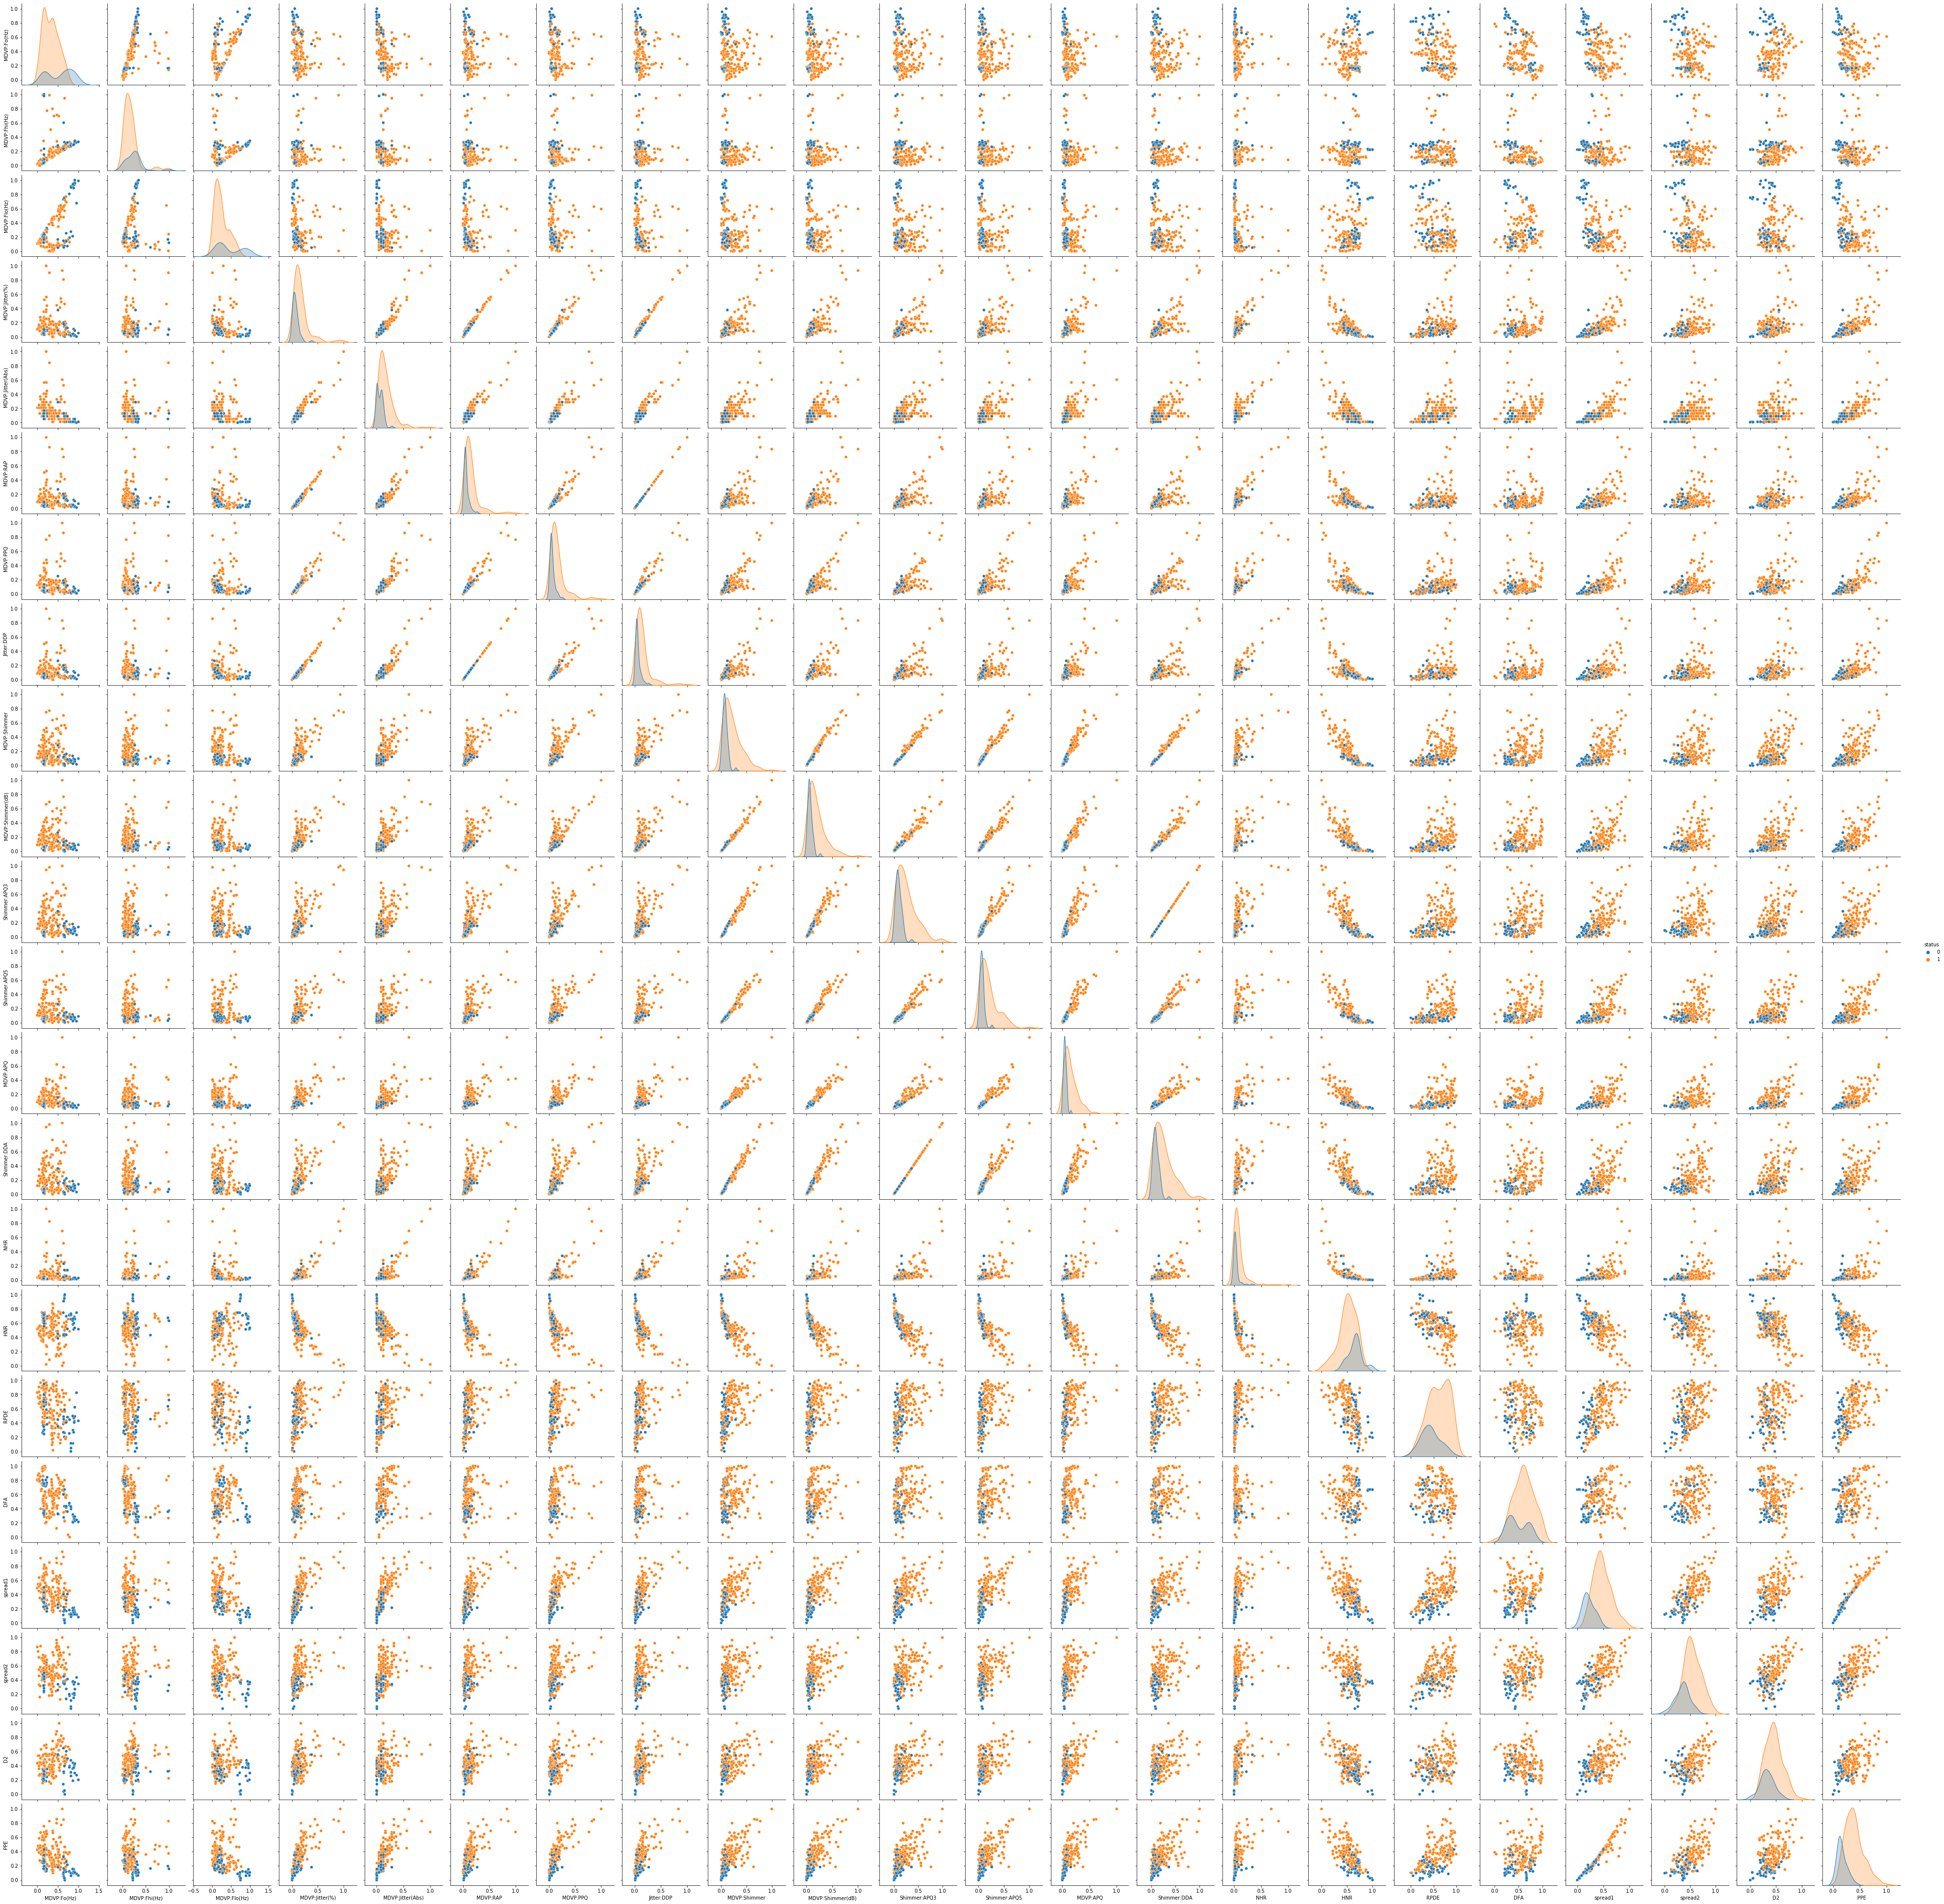

In [80]:
sns.pairplot(prep_df.iloc[:,0:],hue='status')
plt.savefig("pair plot.png")

## Feature selection by Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

feat_names = prep_df.columns[:-1]
rf = RandomForestRegressor()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))

Features sorted by their score:
[(0.2831, 'PPE'), (0.167, 'spread1'), (0.0979, 'MDVP:Fo(Hz)'), (0.0583, 'MDVP:Fhi(Hz)'), (0.0544, 'spread2'), (0.0427, 'D2'), (0.0394, 'RPDE'), (0.0315, 'Shimmer:DDA'), (0.0233, 'Shimmer:APQ5'), (0.0224, 'MDVP:Flo(Hz)'), (0.0211, 'NHR'), (0.0204, 'HNR'), (0.0201, 'Shimmer:APQ3'), (0.0198, 'Jitter:DDP'), (0.0178, 'DFA'), (0.0177, 'MDVP:APQ'), (0.0134, 'MDVP:Jitter(%)'), (0.0117, 'MDVP:RAP'), (0.0116, 'MDVP:Shimmer(dB)'), (0.0108, 'MDVP:PPQ'), (0.0092, 'MDVP:Jitter(Abs)'), (0.0065, 'MDVP:Shimmer')]


In [154]:
 feat_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_names), 
             reverse=True))

In [160]:
feat_imp[0]

0     2.83e-01
1     1.67e-01
2     9.79e-02
3     5.83e-02
4     5.44e-02
5     4.27e-02
6     3.94e-02
7     3.15e-02
8     2.33e-02
9     2.24e-02
10    2.11e-02
11    2.04e-02
12    2.01e-02
13    1.98e-02
14    1.78e-02
15    1.77e-02
16    1.34e-02
17    1.17e-02
18    1.16e-02
19    1.08e-02
20    9.20e-03
21    6.50e-03
Name: 0, dtype: float64

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


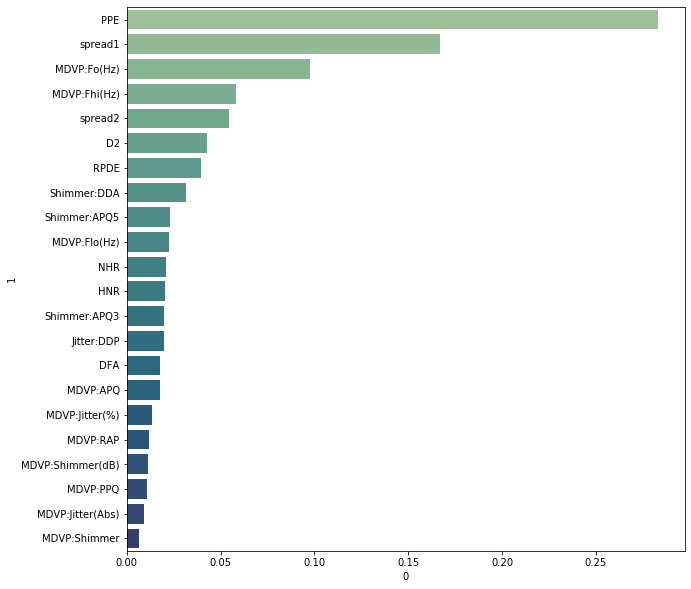

In [162]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(195, 195, s=100, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.barplot(feat_imp[0], feat_imp[1],palette="crest")

plt.savefig("Feature Imp.png")

## Feature subset selection by wrapper forward selction

In [102]:
X.shape

(195, 22)

In [167]:
#sorted according to increasing feature imp
prep_df = prep_df[['PPE', 'spread1', 
                   'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'spread2',
                   'D2', 'RPDE', 'Shimmer:DDA', 
                  'Shimmer:APQ5', 'MDVP:Flo(Hz)','NHR','HNR', 'Shimmer:APQ3', 
                  'Jitter:DDP', 'DFA', 'MDVP:APQ',
                   'MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:Shimmer(dB)',
                    'MDVP:PPQ','MDVP:Jitter(Abs)', 'MDVP:Shimmer','status']]

In [150]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

### Modelings

### SVM



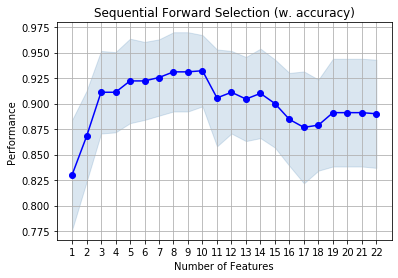

In [260]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
#from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
sfs = SFS(clf, 
          k_features=22, 
          forward=True,
          floating=False, 
          scoring='accuracy',
          cv=45)
sfs = sfs.fit(prep_df.drop(['status'],axis=1), prep_df['status'])
fig = plot_sfs(sfs.get_metric_dict(), kind='ci')
plt.title('Sequential Forward Selection (w. accuracy)')
plt.grid()
plt.savefig("forward selction Linreg.png")

In [271]:
prep_df.iloc[:,0:5].columns

Index(['PPE', 'spread1', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'spread2'], dtype='object')

In [274]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(prep_df.iloc[:,0:4]
                                                    ,prep_df['status'], 
                                                    test_size=0.3,random_state=109)

In [244]:
X_test

PPE  spread1  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  spread2
1    0.67     0.70         0.20          0.09     0.74
171  0.24     0.30         0.14          0.06     0.48
47   0.09     0.12         0.96          0.33     0.44
5    0.65     0.67         0.19          0.06     0.66
105  0.14     0.17         0.36          0.12     0.46
..    ...      ...          ...           ...      ...
76   0.31     0.40         0.14          0.10     0.75
172  0.27     0.34         0.13          0.02     0.42
79   0.48     0.55         0.07          0.03     0.58
188  0.16     0.23         0.15          0.03     0.32
187  0.20     0.29         0.16          0.98     0.25

[59 rows x 5 columns]

Accuracy: 0.864406779661017
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.89      0.93      0.91        44

    accuracy                           0.86        59
   macro avg       0.83      0.80      0.81        59
weighted avg       0.86      0.86      0.86        59

[[10  5]
 [ 3 41]]


Text(0.5, 257.44, 'Predicted label')

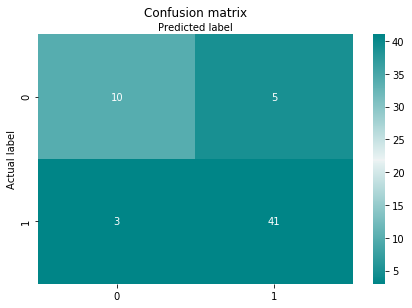

In [275]:

from sklearn import svm

#Create a svm Classifier
#clf = svm.SVC(kernel='poly') # Linear Kernel
clf =AdaBoostClassifier()
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap=cmap,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.savefig("confmatr2.png")

In [226]:
len(y_test[y_test==0])

15